**LAB-12:K-Means Clustering**

---



* Created Date: 29.04.2024
* Created By: Blessy Louis(2348416)
* edited on: 29.04.2024

#Importing the necessary packages and libaries


1. **sklearn.metrics.confusion_matrix**: This library provides functionality to compute confusion matrix to evaluate the accuracy of a classification.

2. **sklearn.model_selection.train_test_split**: This library is used to split the dataset into training and testing sets. It's commonly used to assess the performance of a machine learning model.

3. **sklearn.svm**: This is the Support Vector Machines (SVM) implementation in scikit-learn, a popular machine learning library in Python. It provides implementations of SVM algorithms for classification and regression tasks.

4. **sklearn.metrics.f1_score**: This library provides functionality to compute the F1 score, which is the harmonic mean of precision and recall. It's commonly used as a performance metric for classification problems.

5. **matplotlib.pyplot**: Matplotlib is a plotting library for Python. `pyplot` is a subpackage of Matplotlib that provides a MATLAB-like interface for creating plots and visualizations.

6. **numpy**: NumPy is a fundamental package for scientific computing in Python. It provides support for multi-dimensional arrays and matrices, along with a large collection of mathematical functions.

7. **pandas**: Pandas is a powerful library for data manipulation and analysis in Python. It provides data structures and functions to work with structured data efficiently, primarily in the form of DataFrame objects.

8. **seaborn**: Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In summary, these libraries are essential tools for performing machine learning tasks, including data manipulation, model training, evaluation, and visualization. They offer a wide range of functionalities to streamline the machine learning workflow and facilitate the analysis of data and models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Dataset**
Segmentation data - Legend
The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers.

# **Features							**
* ID: 	numerical	Integer	Shows a unique identificator of a customer.

* Sex	: categorical	{0,1}	Biological sex (gender) of a customer. In this dataset there are only 2 different options.(	0	male,1	female)


* Marital status:	categorical	{0,1}	Marital status of a customer.(0 single	1	non-single (divorced / separated / married / widowed)

* Age	numerical	Integer	The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset(18	Min value (the lowest age observed in the dataset)76	Max value (the highest age observed in the dataset)

* Education	categorical:	{0,1,2,3}	Level of education of the customer		(0	other / unknown	,1	high school			,2	university,3	graduate school	)

* Income:	numerical	Real	Self-reported annual income in US dollars of the customer.

* Occupation: 	categorical	{0,1,2}	Category of occupation of the customer.	(0	unemployed / unskilled,1	skilled employee / official	,2	management / self-employed / highly qualified employee / officer)

* Settlement size:	categorical	{0,1,2}	The size of the city that the customer lives in.(0	small city,1	mid-sized city,2	big city)


In [2]:
df=pd.read_csv('segmentation data.csv')

# **EDA**

**Displaying first 5 rows of the dataset**

In [3]:
df.head()

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

In [4]:
df.shape

(2000, 8)

clearly the dataset has 2000 rows and 8 columns

**Data Description: Features in the data**

In [5]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

**Checking for null values**

In [6]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

Clearly we see that there are no null values in the dataset

**Displaying the information about the data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB




- **RangeIndex:** This indicates that the DataFrame has 2000 entries, with index values ranging from 0 to 1999.
- **Data columns:** There are 8 columns in total.
  1. **ID:** An identifier column with integer values.
  2. **Sex:** A column indicating gender, with integer values. Typically, 1 could represent male and 0 could represent female, or vice versa.
  3. **Marital status:** This column likely represents the marital status of individuals, also with integer values.
  4. **Age:** An integer column representing the age of individuals.
  5. **Education:** This column represents the level of education, possibly encoded as integers (e.g., 1 for high school, 2 for bachelor's degree, etc.).
  6. **Income:** An integer column representing income.
  7. **Occupation:** This column could represent the occupation of individuals, encoded as integers.
  8. **Settlement size:** This column might represent the size of the settlement where individuals reside, also encoded as integers.

- **Dtype:** All columns are of the integer type (`int64`), indicating that all data in this DataFrame consists of integers.

This DataFrame appears to be a dataset containing demographic and socioeconomic information about 2000 individuals, with each row representing a unique individual and each column representing a different attribute or characteristic.

### **Univariate Analysis**

Numerical Variables:

In [8]:
df.describe()

ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000     0.000000         0.000000  
50%    115548.500000     1.000000         1.000000  
75%    138072.250000     1.000000         1.000000  
max    309364.000000     2.000000         2.000000

  **Visualize distribution of different numerical data**

Age
26    0.0580
27    0.0555
25    0.0440
24    0.0415
28    0.0400
35    0.0395
23    0.0385
31    0.0380
36    0.0365
29    0.0350
30    0.0350
32    0.0335
33    0.0330
34    0.0300
40    0.0290
37    0.0280
38    0.0255
22    0.0245
42    0.0240
39    0.0200
46    0.0175
21    0.0170
41    0.0165
43    0.0165
45    0.0155
44    0.0150
49    0.0145
48    0.0145
47    0.0130
50    0.0115
20    0.0115
57    0.0100
52    0.0095
51    0.0095
54    0.0085
53    0.0080
63    0.0075
64    0.0070
60    0.0065
61    0.0065
65    0.0060
58    0.0060
55    0.0050
67    0.0050
56    0.0050
66    0.0045
62    0.0040
68    0.0035
19    0.0025
59    0.0025
71    0.0025
74    0.0020
70    0.0015
73    0.0015
18    0.0015
75    0.0010
72    0.0005
76    0.0005
Name: proportion, dtype: float64


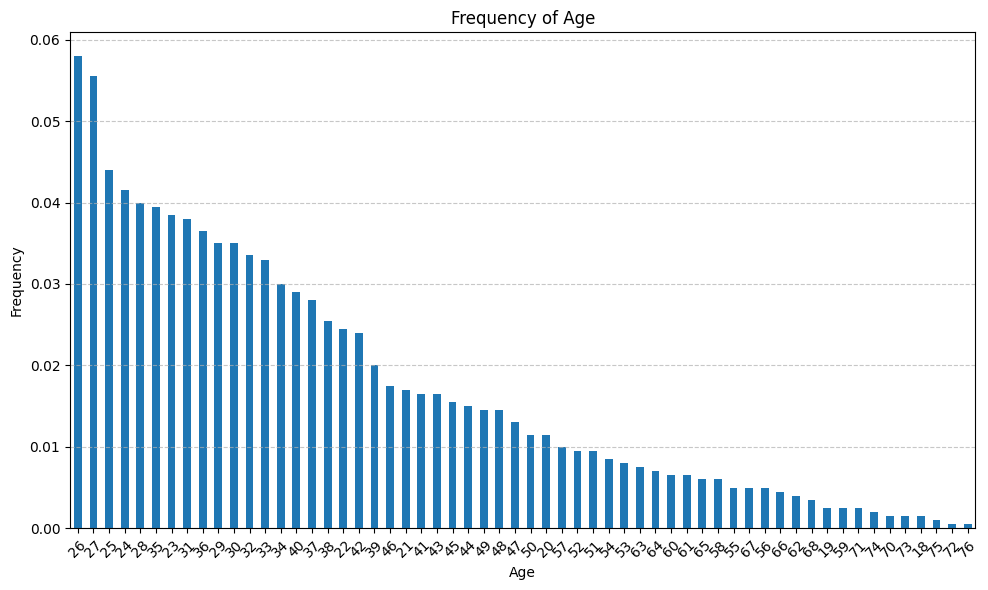

In [10]:
Age_freq = df['Age'].value_counts(normalize=True)
print(Age_freq)
# Plotting the bar chart
plt.figure(figsize=(10, 6))
Age_freq.plot(kind='bar')
plt.title('Frequency of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

This graph shows the age distribution in the dataset clearly we see that customers  with age 26 are more in the dataset with almost 6%  occurence follwed by people with age 27 , but the least occurence would be senior citizens especially with age 70 and above

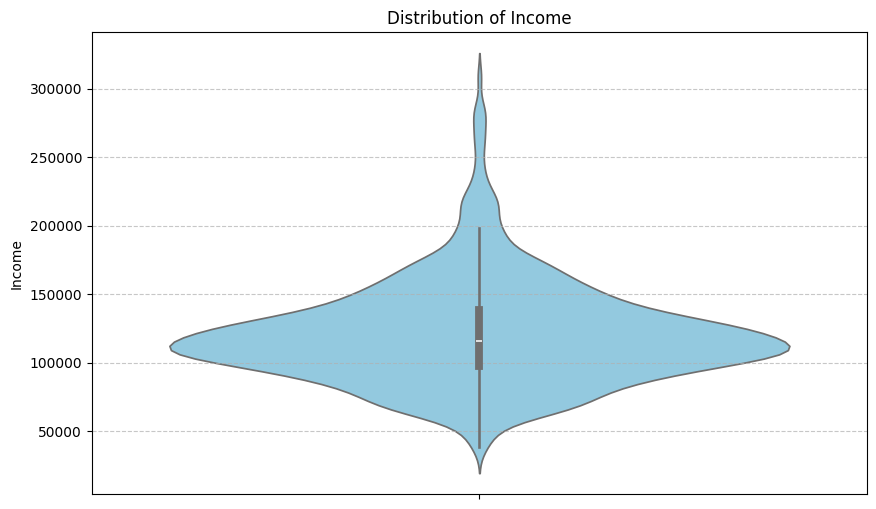

In [11]:
# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, y='Income', color='skyblue')
plt.title('Distribution of Income')
plt.ylabel('Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization
plt.show()

This Violin plot shows the distribution of Income of the customers , we see that maximum number of values are clustered between 50000 to 150000 , which shows that most of the customers have a Income in that range , also we see some outliers beyond 250000

**Categorical Varianles**

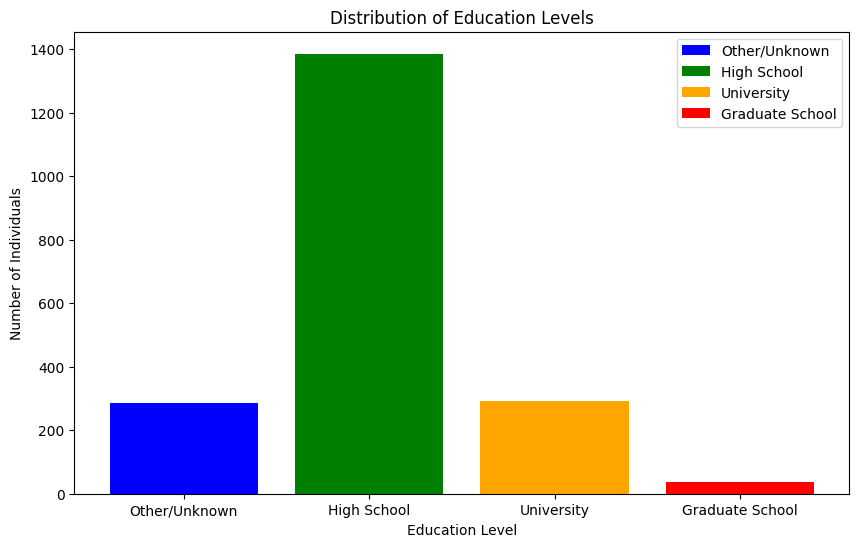

In [12]:
education_categories = {0: 'Other/Unknown', 1: 'High School', 2: 'University', 3: 'Graduate School'}

# Count the number of individuals in each education category
education_counts = df['Education'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(education_counts.index, education_counts.values, color=['blue', 'green', 'orange', 'red'])

# Add labels and title
plt.xlabel('Education Level')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Education Levels')
plt.xticks(education_counts.index, [education_categories[cat] for cat in education_counts.index])

# Add legend
plt.legend(bars, [education_categories[cat] for cat in education_counts.index])

# Show the

This graph shows the distribution of different educational qualifications of the customers, we see that maximum number of customers are high school with almost 1300 occurrence follwed by university , but the least is graduate school

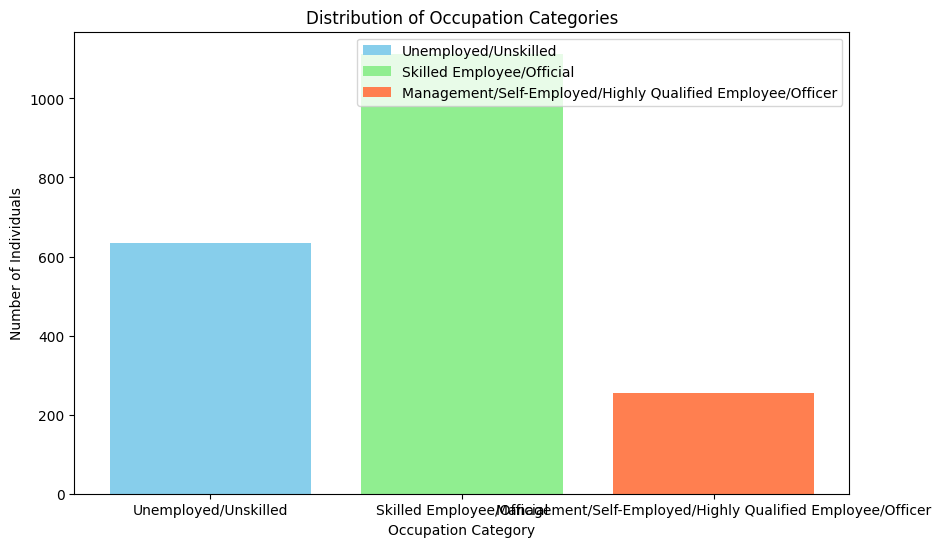

In [13]:
# Define occupation categories and their corresponding labels
occupation_categories = {0: 'Unemployed/Unskilled', 1: 'Skilled Employee/Official', 2: 'Management/Self-Employed/Highly Qualified Employee/Officer'}

# Count the number of individuals in each occupation category
occupation_counts = df['Occupation'].value_counts().sort_index()

# Define custom colors for each occupation category
occupation_colors = ['skyblue', 'lightgreen', 'coral']

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(occupation_counts.index, occupation_counts.values, color=occupation_colors)

# Add labels and title
plt.xlabel('Occupation Category')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Occupation Categories')
plt.xticks(occupation_counts.index, [occupation_categories[cat] for cat in occupation_counts.index])

# Add legend
plt.legend(bars, [occupation_categories[cat] for cat in occupation_counts.index])

# Show the plot
plt.show()


This graphs shows the distribution of the customer's occupation , we see that most of the customers are Skilled employee? official, but the least occurence is mangement/Self-employed/highlyQualufied employees

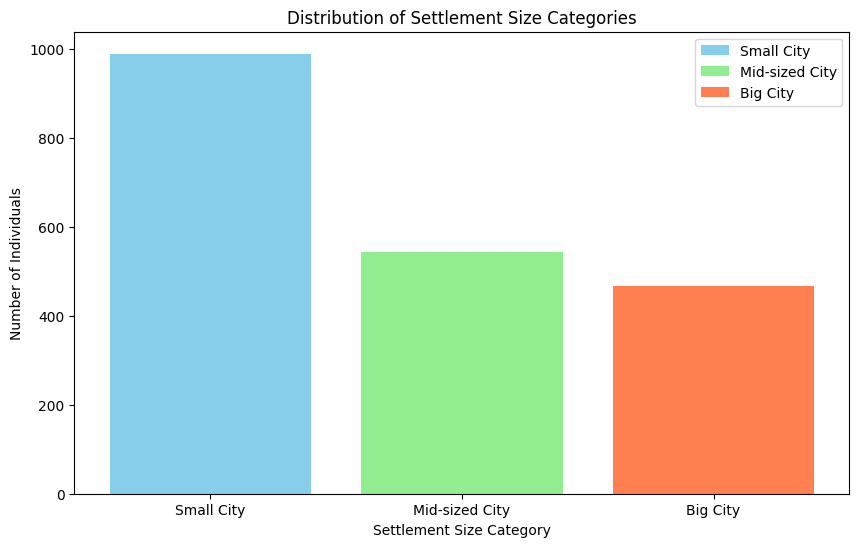

In [14]:
# Define settlement size categories and their corresponding labels
settlement_categories = {0: 'Small City', 1: 'Mid-sized City', 2: 'Big City'}

# Count the number of individuals in each settlement size category
settlement_counts = df['Settlement size'].value_counts().sort_index()

# Define custom colors for each settlement size category
settlement_colors = ['skyblue', 'lightgreen', 'coral']

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(settlement_counts.index, settlement_counts.values, color=settlement_colors)

# Add labels and title
plt.xlabel('Settlement Size Category')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Settlement Size Categories')
plt.xticks(settlement_counts.index, [settlement_categories[cat] for cat in settlement_counts.index])

# Add legend
plt.legend(bars, [settlement_categories[cat] for cat in settlement_counts.index])

# Show the plot
plt.show()


This graph shows the ditribution of the settlement size of customers , we see that most of the customers are from small city and the least are from big city

In [15]:
gender_freq = df['Sex'].value_counts(normalize=True)
print(gender_freq)

Sex
0    0.543
1    0.457
Name: proportion, dtype: float64


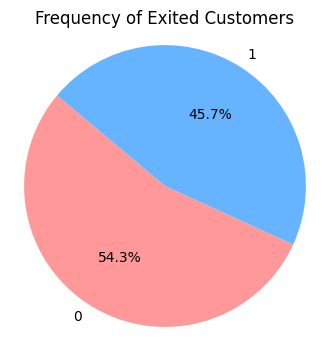

In [19]:
# Define different colors for the pie chart slices
colors = ['#ff9999', '#66b3ff']  # Light red and light blue

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_freq, labels=gender_freq.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Frequency of Exited Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The pie chart depicts the distribution of male and females in the dataset we see that 54.3% of the customers are male , where the rest are females

### **Bivariate Analysis:**

* Explore relationships between pairs of numerical variables:

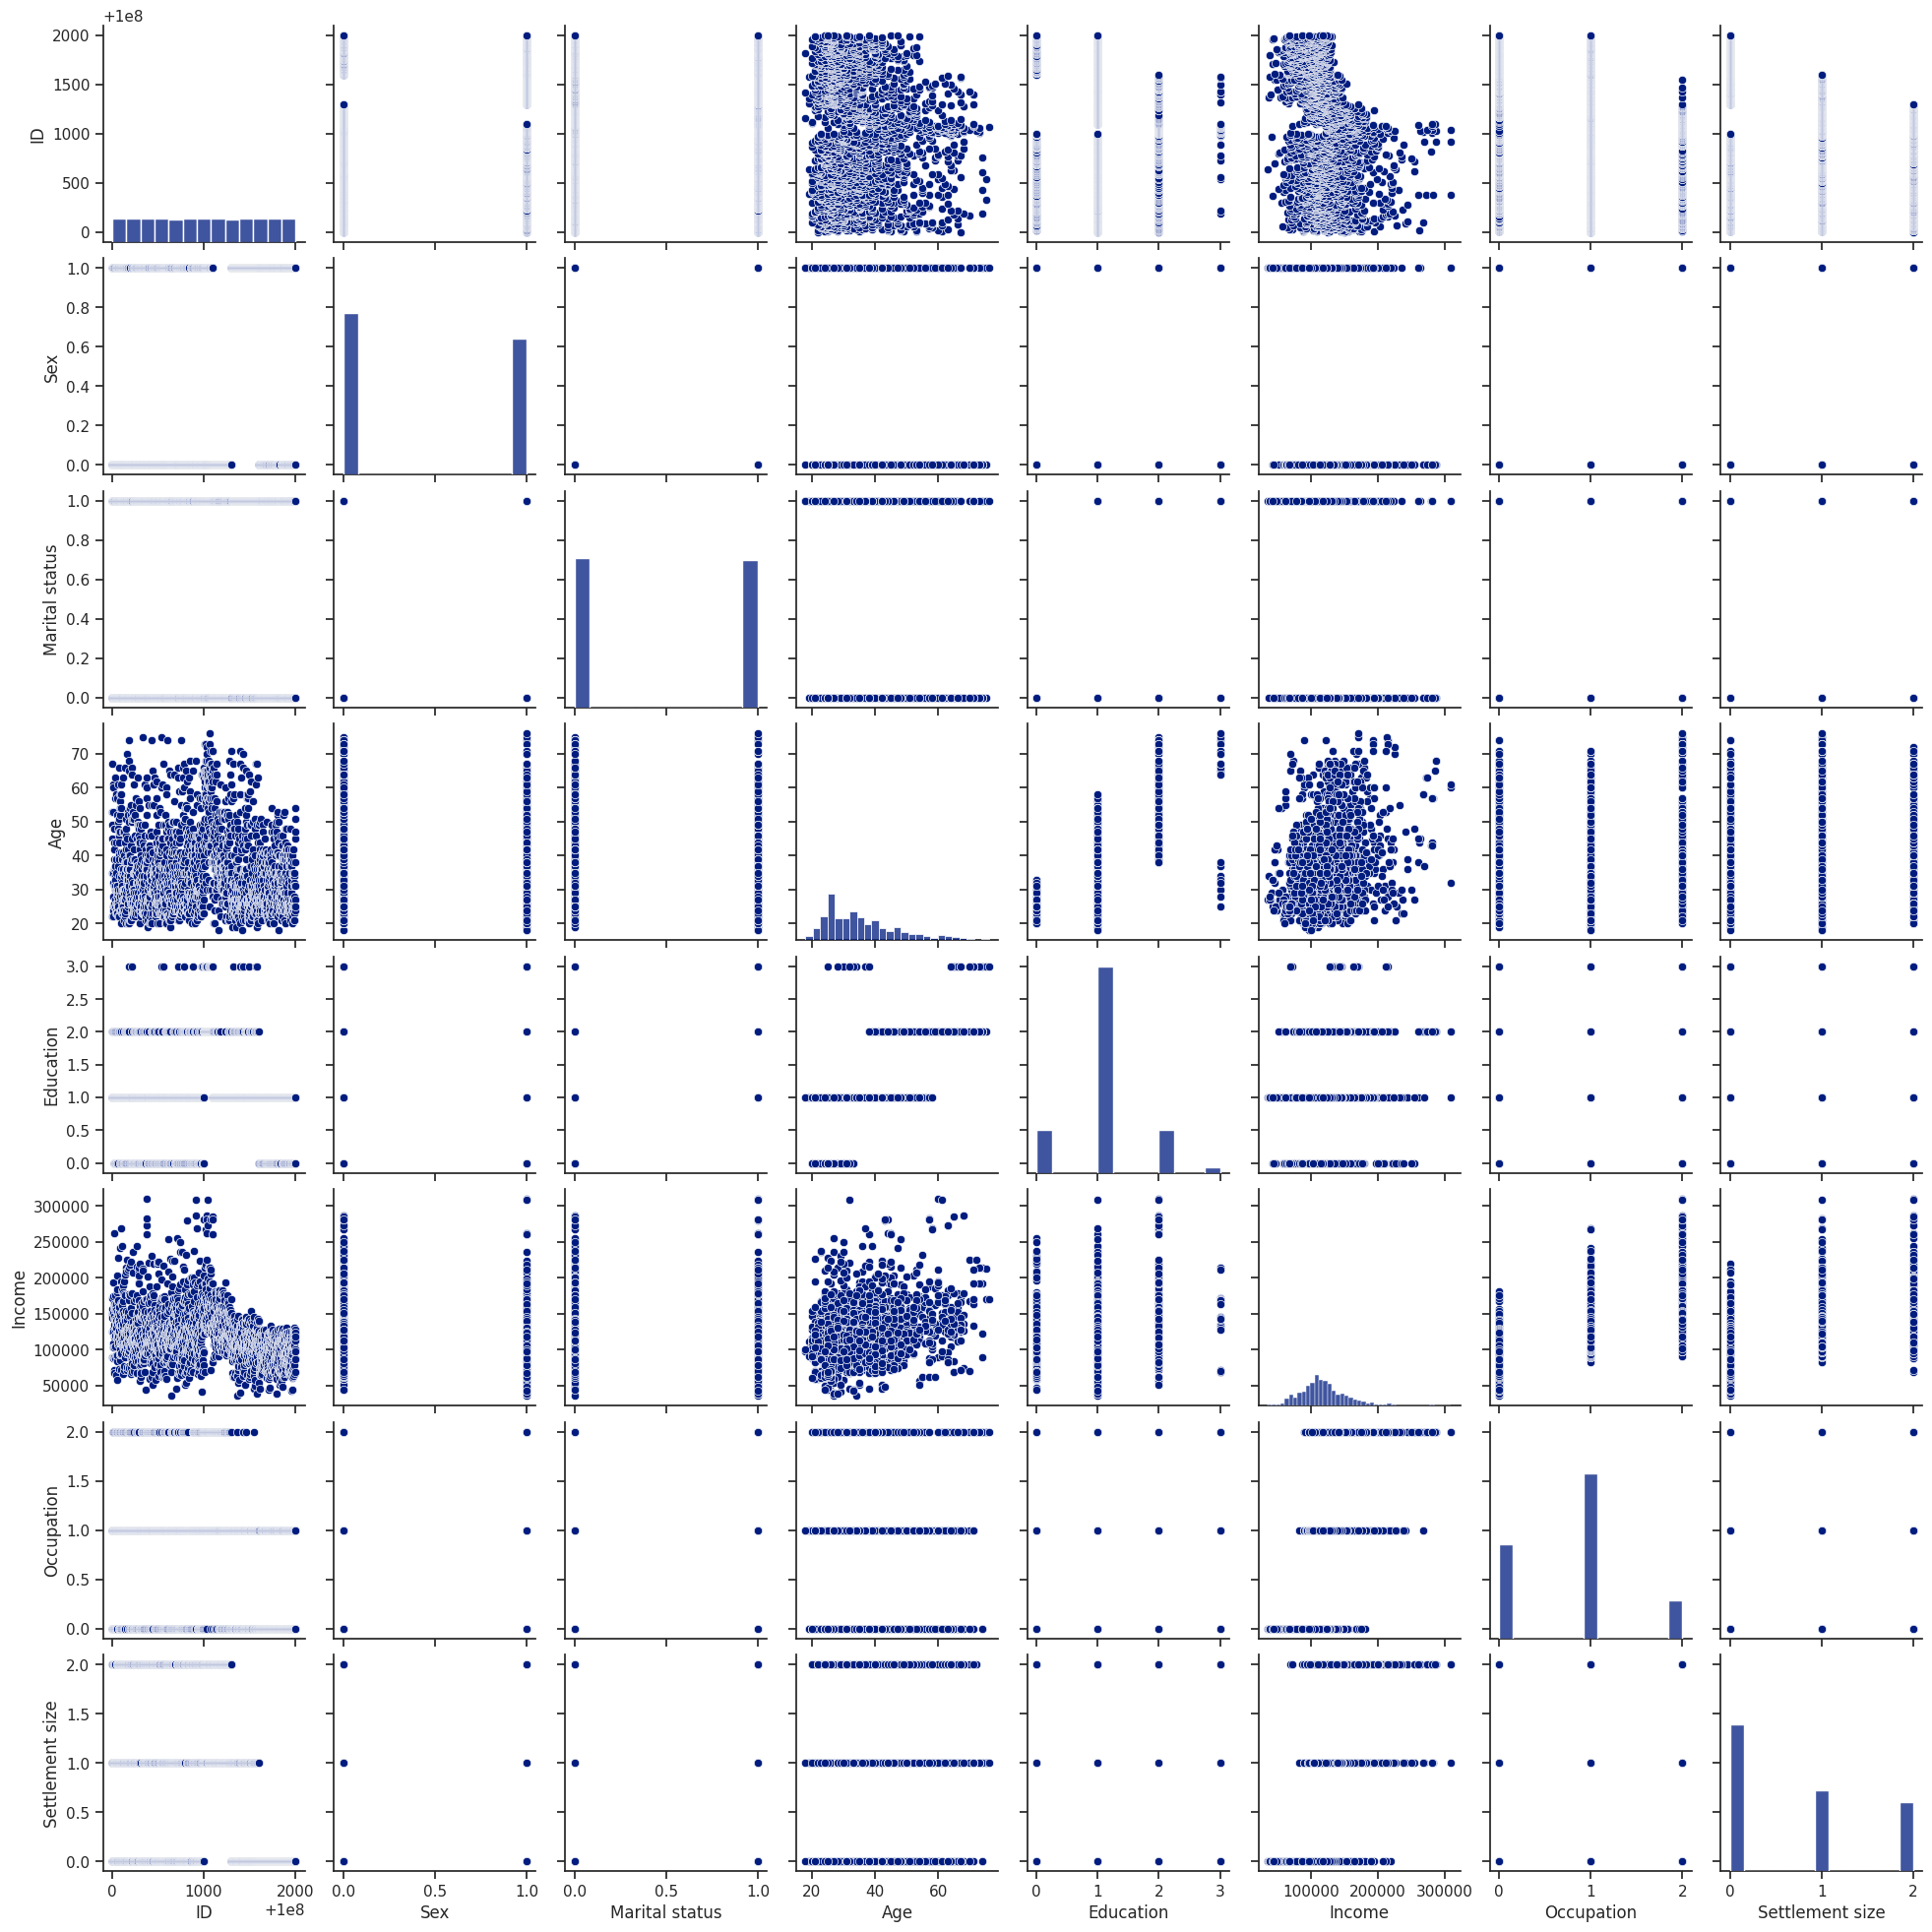

In [20]:
# Set the style and palette
sns.set(style="ticks", palette="dark")

# Create the pairplot
sns.pairplot(df)

# Show the plot
plt.show()

Clearly we see that there exist no linear positive relationship between any of the features

In [22]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                       ID       Sex  Marital status       Age  Education  \
ID               1.000000  0.328262        0.074403 -0.085246   0.012543   
Sex              0.328262  1.000000        0.566511 -0.182885   0.244838   
Marital status   0.074403  0.566511        1.000000 -0.213178   0.374017   
Age             -0.085246 -0.182885       -0.213178  1.000000   0.654605   
Education        0.012543  0.244838        0.374017  0.654605   1.000000   
Income          -0.303217 -0.195146       -0.073528  0.340610   0.233459   
Occupation      -0.291958 -0.202491       -0.029490  0.108388   0.064524   
Settlement size -0.378445 -0.300803       -0.097041  0.119751   0.034732   

                   Income  Occupation  Settlement size  
ID              -0.303217   -0.291958        -0.378445  
Sex             -0.195146   -0.202491        -0.300803  
Marital status  -0.073528   -0.029490        -0.097041  
Age              0.340610    0.108388         0.119751  
Education 

This correlation matrix provides insights into the relationships between different variables in your dataset.
1. **ID Correlations:**
   - The ID column typically serves as an identifier and doesn't have meaningful correlations with other variables. All correlation values with other columns are relatively low, indicating no strong linear relationships.

2. **Sex Correlations:**
   - There's a moderate positive correlation (0.33) between sex and ID, suggesting some association between gender and ID, although it's not strong.
   - There's a strong positive correlation (0.57) between sex and marital status, indicating that gender and marital status are somewhat related.
   - The correlation with other variables such as age and settlement size is also present but not as strong.

3. **Marital Status Correlations:**
   - There's a moderate positive correlation (0.57) between marital status and sex, indicating a relationship between these two variables.
   - The correlations with other variables like age, education, income, occupation, and settlement size are present but not as strong.

4. **Age Correlations:**
   - Age shows a moderate positive correlation with education (0.65) and income (0.34), indicating that older individuals tend to have higher education levels and incomes.
   - The correlation with other variables like sex, marital status, occupation, and settlement size is either weak or negligible.

5. **Education Correlations:**
   - Education exhibits moderate positive correlations with age (0.65) and income (0.23), suggesting that individuals with higher education levels tend to be older and have higher incomes.
   - The correlations with other variables like sex, marital status, occupation, and settlement size are relatively weak.

6. **Income Correlations:**
   - Income shows moderate positive correlations with occupation (0.68) and settlement size (0.49), indicating that individuals with higher incomes are more likely to have occupations associated with higher status and reside in larger settlements.
   - The correlations with other variables like age, sex, marital status, and education are present but relatively weak.

7. **Occupation Correlations:**
   - Occupation exhibits a strong positive correlation with income (0.68), indicating that individuals in certain occupations tend to have higher incomes.
   - The correlation with settlement size (0.57) is also relatively strong, suggesting that occupation may influence where individuals choose to live.
   - The correlations with other variables like age, sex, marital status, and education are relatively weak.

8. **Settlement Size Correlations:**
   - Settlement size shows moderate positive correlations with income (0.49) and occupation (0.57), indicating that individuals living in larger settlements tend to have higher incomes and occupations associated with higher status.
   - The correlations with other variables like age, sex, marital status, and education are relatively weak.

These correlation values provide valuable insights into how variables are related to each other within your dataset.

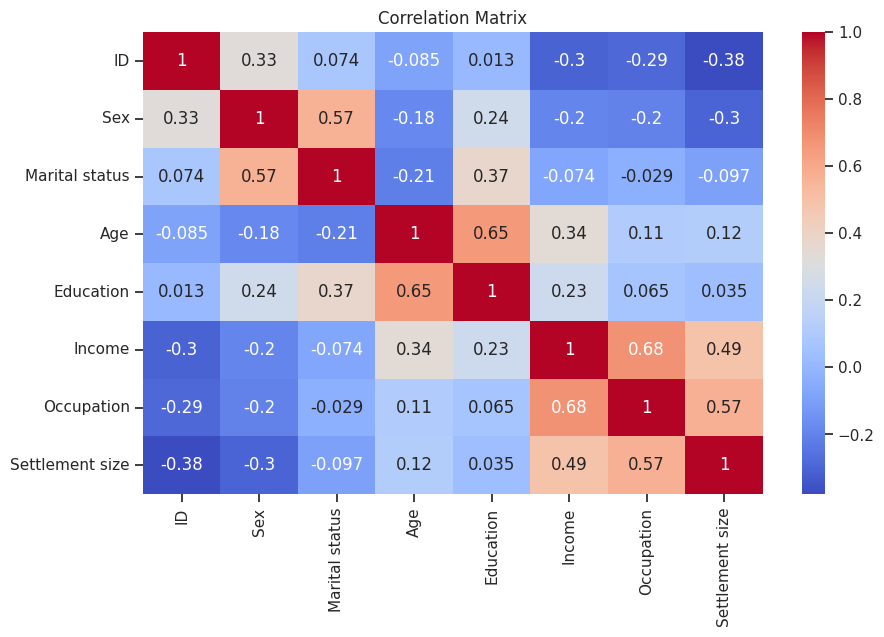

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix provides valuable insights into the relationships between various demographic and socioeconomic variables within the dataset. Overall, age shows moderate positive correlations with education and income, indicating that older individuals tend to have higher education levels and incomes. Education exhibits moderate positive correlations with age and income, suggesting that individuals with higher education levels tend to be older and have higher incomes. Income is moderately correlated with occupation and settlement size, indicating that individuals with higher incomes tend to hold occupations associated with higher status and reside in larger settlements. Occupation shows a strong positive correlation with income, suggesting that certain occupations are associated with higher incomes. Additionally, settlement size is moderately correlated with income and occupation, indicating that individuals in larger settlements tend to have higher incomes and occupations associated with higher status. While these correlations provide valuable insights, it's essential to remember that correlation does not imply causation, and other factors may influence these relationships.

# K Means Clustering

**Declare feature vector and target variable**

In [24]:
X = df

y = df['Settlement size']

**Feature Scaling**

In [25]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

**K-Means model with two clusters**

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

**K-Means model parameters study**

In [29]:
kmeans.cluster_centers_

array([[4.04831161e-01, 4.44089210e-15, 2.23782772e-01, 3.45102028e-01,
        3.00561798e-01, 3.39290359e-01, 4.72378277e-01, 4.89700375e-01],
       [6.09056138e-01, 9.80686695e-01, 8.09012876e-01, 2.67148883e-01,
        3.98068670e-01, 2.79004817e-01, 3.28326180e-01, 2.31759657e-01]])

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.
The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster centroids.
The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.

### Inertia


- **Inertia** is not a normalized metric.

- The lower values of inertia are better and zero is optimal.

- But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of `curse of dimensionality`).

- Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

- We can calculate model inertia as follows:-

In [30]:
kmeans.inertia_

1174.2949105420175

- The lesser the model inertia, the better the model fit.

- We can see that the model has very high inertia. So, this is not a good model fit to the data.

**Check quality of weak classification by the model**

In [31]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 582 out of 2000 samples were correctly labeled.


In [32]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.29


An accuracy score of 0.29 for a K-means clustering model suggests that the model's performance is relatively low. In clustering, accuracy is not typically used as a performance metric because clustering is an unsupervised learning technique, meaning that there are no true labels to compare the clusters to. Instead, evaluation metrics such as silhouette score or Davies–Bouldin index are commonly used to assess the quality of clusters. However, if accuracy is being used in this context, it may indicate that the clusters generated by the K-means algorithm do not align well with the true underlying structure of the data. A score of 0.29 suggests that less than one-third of the data points are correctly assigned to their respective clusters according to some criteria, but it's essential to consider other evaluation metrics and domain knowledge to gain a comprehensive understanding of the model's performance and the underlying data structure.

**Use elbow method to find optimal number of clusters**

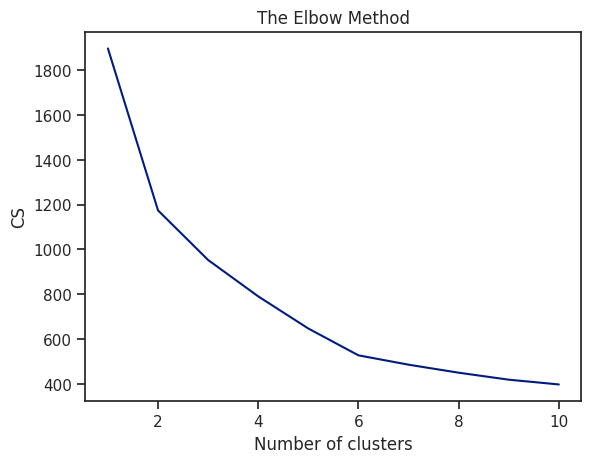

In [33]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


- By the above plot, we can see that there is a kink at k=2.

- Hence k=2 can be considered a good number of the cluster to cluster this data.

- But, we have seen that I have achieved a weak classification accuracy of 3% with k=2.



** K-Means model with different clusters**

In [34]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Result: 205 out of 2000 samples were correctly labeled.
Accuracy score: 0.10


**K-Means model with 4 clusters**

In [35]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 111 out of 2000 samples were correctly labeled.
Accuracy score: 0.06


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**K-Means model with 5 clusters**

In [36]:
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 276 out of 2000 samples were correctly labeled.
Accuracy score: 0.14


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**K-Means model with 6 clusters**

In [37]:
kmeans = KMeans(n_clusters=6, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 568 out of 2000 samples were correctly labeled.
Accuracy score: 0.28


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**K-Means model with 7 clusters**

In [38]:
kmeans = KMeans(n_clusters=7, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Result: 230 out of 2000 samples were correctly labeled.
Accuracy score: 0.12


## **Conclusion**

- **K=2:** The accuracy score is 0.29, indicating that roughly 29% of the samples were correctly labeled. This suggests that the model's performance is better than random chance but still relatively low.

- **K=3:** The accuracy score is 0.10, with 205 out of 2000 samples correctly labeled. This score is lower than K=2, suggesting that increasing the number of clusters did not improve the model's performance.

- **K=4:** The accuracy score is 0.06, with only 111 out of 2000 samples correctly labeled. This further decrease in accuracy indicates that adding more clusters did not lead to better clustering.

- **K=5:** The accuracy score is 0.14, with 276 out of 2000 samples correctly labeled. While there's a slight improvement compared to K=4, the overall accuracy remains low.

- **K=6:** The accuracy score is 0.28, with 568 out of 2000 samples correctly labeled. This represents the highest accuracy among the provided \( k \) values, suggesting that the model performs relatively better with six clusters.

- **K=7:** The accuracy score is 0.12, indicating a decrease in accuracy compared to K=6. This suggests that adding more clusters beyond six did not improve the model's performance.

In summary, the comparative analysis reveals that the K-means clustering model performs relatively better with \( k = 6 \) compared to other values of \( k \). However, even with \( k = 6 \), the accuracy remains relatively low, suggesting that the clustering algorithm may not be effectively capturing the underlying structure of the data. It's essential to consider other evaluation metrics and possibly explore alternative clustering algorithms or preprocessing techniques to improve clustering performance.